In [8]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)
tf.random.set_seed(24)

In [5]:
fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


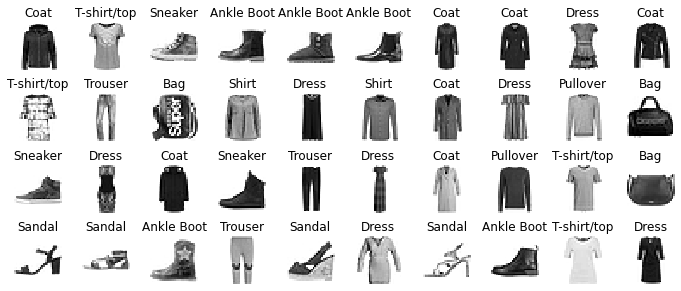

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
   1/1719 [..............................] - ETA: 3:45 - loss: 2.3631 - accuracy: 0.1250

2021-07-26 10:27:38.831985: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-26 10:27:38.832183: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 2s 871us/step - loss: 1.0002 - accuracy: 0.6804 - val_loss: 0.5200 - val_accuracy: 0.8218
Epoch 2/30
1719/1719 [==============================] - 1s 577us/step - loss: 0.5076 - accuracy: 0.8239 - val_loss: 0.4439 - val_accuracy: 0.8514 - loss: 0.5120 - accura
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4566 - accuracy: 0.8412 - val_loss: 0.4448 - val_accuracy: 0.8460
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4287 - accuracy: 0.8502 - val_loss: 0.3981 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 1s 632us/step - loss: 0.3997 - accuracy: 0.8600 - val_loss: 0.3900 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 1s 545us/step - loss: 0.3885 - accuracy: 0.8623 - val_loss: 0.4168 - val_accuracy: 0.8580
Epoch 7/30
1719/1719 [==============================] - 1s 555us/step - loss: 0.3774 - accuracy: 0.8676 - val_loss:

In [ ]:
model.evaluate(X_test, y_test)